# Salary investigations

2018-01
Justin Gosses

## Questions to answer:
- 1: "Which job title am I actually doing in my current position"
- 2: "What is an appropriate market rate for that job title"

### Part 1: 
Gather job titles & skills associated with each job title. 
Identify which job title best applies to what I do by comparing what I do (and what is in my resume) to job descriptions

https://insights.dice.com/wp-content/themes/dicenews2018/assets/d3/2017/skills-heat/index.html

#### Job titles & title_general

-  [Web Developer] - Web Developer, Entry Level Web Developer, Junior Web Developer, Senior Web Developer, Web Designer
- [Software Developer] - Software Developer, Junior Software Developer, Senior Software Developer
- [Software Engineer] - Software Engineer, Senior Software Engineer, Lead Software Engineer, Senior Software - Developer, Software Engineer II, Principle Software Engineer
- [Data Scientist] - Data Scientist, Senior Data Scientist, Junior Data Scientist
- [Data Analyst] -Data Analyst, Senior Data Analyst, Quantitative Analyst, Statistical Analyst, Prediction Analyst

In [3]:
#### 'jobsAndSkills' Array to hold all 'job objects'
jobsAndSkills = []
#### template for 'job objects'
jobObj = {"title":"","title_general":"","senorityMarker":"none","skills":[],"salary":0,"link":"www.google.com"}

In [4]:
jobObj_New = jobObj
jobObj_New["title"] = "Data Scientist"
jobObj_New["title_general"] = "Data Scientist"
jobObj_New["senorityMarker"] = "none"
jobObj_New["skills"] = ["MATLAB", "Python", "R", "JavaScript", "Spotfire", "MySQL", "MongoDB","GitHub","new technology","development","API","web scraping"]
jobObj_New["link"] = "https://www.glassdoor.com/job-listing/data-scientist-quantum-reservoir-impact-JV_IC1140171_KO0,14_KE15,39.htm?jl=2548760154&ctt=1517538990008"
jobsAndSkills.append(jobObj_New)

In [5]:
jobObj_New = jobObj
jobObj_New["title"] = "Full-Stack JavaScript Engineer"
jobObj_New["title_general"] = "Software Engineer"
jobObj_New["senorityMarker"] = "none"
jobObj_New["skills"] = ["JavaScript", "ES6", "Webpack", "Browserify", "Grunt", "Gulp", "NPM","GitHub","new technology","development","API","MongoDB","React", "Knockout","Ember","Backbone","Front End","HTML","CSS","OpenLayers","large-scale","UI","logic"]
jobObj_New["salary"] = 130000
jobObj_New["link"] = "https://www.glassdoor.com/job-listing/full-stack-javascript-engineer-quantum-reservoir-impact-JV_IC1140171_KO0,30_KE31,55.htm?jl=2571560635&ctt=1517539368472"
jobsAndSkills.append(jobObj_New)

In [6]:
jobObj_New = jobObj
jobObj_New["title"] = "Software Engineer"
jobObj_New["title_general"] = "Software Engineer"
jobObj_New["senorityMarker"] = "none"
jobObj_New["skills"] = ["software design", "C++", "C", "Java", "Unix", "Linux", "communication","testing","implementation","software design","teamwork","Mathematics","computer science", "mathematics","user support"]
jobObj_New["salary"] = 81000
jobObj_New["link"] = "https://www.glassdoor.com/job-listing/software-engineer-leidos-JV_IC1140171_KO0,17_KE18,24.htm?jl=2645870637&ctt=1517539822878"
jobsAndSkills.append(jobObj_New)

In [7]:
jobObj_New = jobObj
jobObj_New["title"] = "Senior Software Engineer"
jobObj_New["title_general"] = "Software Engineer"
jobObj_New["senorityMarker"] = "none"
jobObj_New["skills"] = ["complex problems", "C++", "C", "Java", "Python", "CVS", "Subversion","Git","Windows","software design","linux","Visual Studio","computer science", "Eclipse","NetBeans","ANT","project management"," Object Oriented Design","debugging","creative"]
jobObj_New["salary"] = 83000
jobObj_New["link"] = "https://www.glassdoor.com/job-listing/senior-software-engineer-open-systems-international-JV_IC1140171_KO0,24_KE25,51.htm?jl=2209251302&ctt=1517539813287"
jobsAndSkills.append(jobObj_New)

In [8]:
jobObj_New = jobObj
jobObj_New["title"] = "Web Developer"
jobObj_New["title_general"] = "Web Developer"
jobObj_New["senorityMarker"] = "none"
jobObj_New["skills"] = ["shifting priorities", "rework", "ambiguity", "fast paced", "HTML", "CSS", "Javascript","React","jQuery","photoshop","Illustrator","Java","Ruby","C#"]
jobObj_New["salary"] = 0
jobObj_New["link"] = "https://www.glassdoor.com/job-listing/web-developer-vitamin-t-JV_IC1140171_KO0,13_KE14,23.htm?jl=2650519801&ctt=1517540652099"
jobsAndSkills.append(jobObj_New)

In [9]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
import re

In [10]:
df = pd.read_csv('DICE_2017_skills_hierarchy_skill_list_txt.csv')
df.head()

,ratio,tag,x,y,sector,skill
0,1.50,Operations,0.57819,0.86682,NaN,NaN
1,1.12,Database,0.61363,0.68666,NaN,NaN
2,1.32,Network,0.53984,0.71231,NaN,NaN
3,1.50,SQL,0.47992,0.71771,Data,SQL
4,1.43,Project management,0.48109,0.68706,NaN,NaN


In [11]:
tag = df[['tag']]
print("length of tag = ",len(tag))
tag[0:10]

length of tag =  700


,tag
0,Operations
1,Database
2,Network
3,SQL
4,Project management
5,Software development
6,Security
7,Java
8,Analytics
9,Oracle


#### Functions to check if a skill tag exists already in the dataframe. If not, adds it.

In [12]:
# tag.get_value(0,1)
tag.iloc[[0],[0]]

,tag
0,Operations


In [13]:
#### In a dataframe with a tag column, check if the given string [new_tag] is in that column
def checkForNewTag(df,new_tag):
    result_index = df.index[df['tag'] == new_tag].tolist()
    # print(type(result_index),len(result_index))
    
    if len(result_index) == 0:
        return "not there"
    else:
#         print(result_index[0])
#         print(df.iloc[[result_index[0]],[0]])
        print(result_index[0],df.iloc[result_index[0]]['tag'])
#         print(result_index,df.get_value(result_index[0],0))
        return "found it",result_index

#### In a dataframe with a tag column, add a new row with the new tag string to it
def addNewTagToDF(df,new_tag):
    df_new = pd.DataFrame([[new_tag]],columns=['tag'])
    appended_df = df.append(df_new).reset_index(drop=True)
    return appended_df

#### For a given dataframe with a tag column, check if tag value exists, if not add it. 
#### Use two functions above as helpers.
def checkForTagIfNotPresentAdd(df,list_of_tags):
    df_here = df.copy()
    for each_tag in list_of_tags:
        # print(each_tag)
        if checkForNewTag(df,each_tag)[0] == "found it":
            pass
        else:
            # print("new one = ",each_tag)
            df_here = addNewTagToDF(df_here,each_tag)
    return df_here

In [14]:
checkForNewTag(tag,'JavaScript')

13 JavaScript


('found it', [13])

#### list of potential new terms I don't remember seeing, are somewhat new, or exist in my resume

In [15]:
list_of_tags = ["microsoft","validation","verification","virtual","web","sed","awk","fortan","ibm","technologists","cybersecurity","security","investment","build","deploy","devops","troubleshoot","strategic","advice","advise","pytorch","collaborate","Source","Code","engineering","global","keras","front","end","back","analytics","coding","code","programming","program","function","alogrithm","browserify","multi","browser","scipy","stakeholders","architecture","reality","impact","process",",workflow","consulting","prototype","innovative","root","cause","amazon","azure","cloud","financial","analysis","data",".net","design","apache","unit","engineering","gpu","user","ui","ux","management","visualization","priorities", "rework", "ambiguity", "fast paced", "HTML", "CSS", "Javascript","React","jQuery","photoshop","Illustrator","Java","Ruby","C#","complex problems", "C++", "C", "Java", "Python", "CVS", "Subversion","Git","Windows","software design","linux","Visual Studio","computer science", "Eclipse","NetBeans","ANT","project management"," Object Oriented Design","debugging","creative","software design", "C++", "C", "Java", "Unix", "Linux", "communication","testing","implementation","software design","teamwork","Mathematics","computer science", "mathematics","user support","JavaScript", "ES6", "Webpack", "Browserify", "Grunt", "Gulp", "NPM","GitHub","new technology","development","API","MongoDB","React", "Knockout","Ember","Backbone","Front End","HTML","CSS","OpenLayers","large-scale","UI","logic","MATLAB", "Python", "R", "JavaScript", "Spotfire", "MySQL", "MongoDB","GitHub","new technology","development","API","web scraping",'Database','svg','JQuery','Scikit-learn','three.js','aframe.js','regression','coached','NumPy','theno','keras','torch','pytorch','wordpress','React.js','graph','Neo4J','ML','Tableau','IoT','Internet of things','Weka','node','node.js','speech-to-text','client','microservices','micro-services','artificial intelligence','AI','random forest','bagging','prediction','web assembly','WASM','interactive','data visualization','meetup','jupyter','PostGres','Postgresql','GIS','map','map making','scikit-learn','tensorflow','d3.js','ar.js','deeplearning','deep learning','deep-learning','neural nets','convolutional','redux','vue','adminestrator','vega']



In [16]:
def takeOutLetters(list_of_tags):
    new_list_of_tags = []
    for skill in list_of_tags:
        if skill == "r" or skill == "R" or skill == "c" or skill == "C":
            pass
        else:
            new_list_of_tags.append(skill)
    return new_list_of_tags

In [17]:
list_of_tags = takeOutLetters(list_of_tags)

In [18]:
len(list_of_tags)

207

#### Function call that takes the list 'list_of_tags' and the 'tag' dataframe and adds the new skills that weren't originally present.

In [19]:
#### Function call that takes the list 'list_of_tags' and the 'tag' dataframe and adds the new skills that weren't originally present.
new_tag_list = checkForTagIfNotPresentAdd(tag,list_of_tags)
#### function will print the index of any skill tags that it finds were already in the list first
#### and then below prints the number of new skill tags added
print("Number of new skill tags is:",len(new_tag_list)-len(tag))

22 HTML
35 CSS
66 jQuery
7 Java
327 Ruby
41 C#
42 C++
7 Java
93 Python
361 CVS
190 Git
176 Eclipse
42 C++
7 Java
23 Unix
19 Linux
182 Mathematics
13 JavaScript
595 GitHub
72 API
413 MongoDB
22 HTML
35 CSS
29 UI
502 MATLAB
93 Python
13 JavaScript
61 MySQL
413 MongoDB
595 GitHub
72 API
1 Database
532 Tableau
Number of new skill tags is: 174


In [20]:
new_tag_list.describe()

,tag
count,874
unique,865
top,software design
freq,3


In [21]:
new_tag_list

,tag
0,Operations
1,Database
2,Network
3,SQL
4,Project management
5,Software development
6,Security
7,Java
8,Analytics
9,Oracle


## Part II
Look at job advertisments and count what skills they ask for or don't ask for

In [20]:
url_string = "https://www.indeed.com/viewjob?jk=8e469ebf881350ff&tk=1c55apoonakacbkd&from=company"
result = requests.get(url_string)

In [21]:
c = result.content

In [22]:
soup = BeautifulSoup(c,'html.parser')
samples = soup.find('span', {"id":"job_summary"})

In [23]:
result_1_test = samples.get_text()

In [24]:
url_string2 = "https://www.indeed.com/viewjob?jk=47cfde4a5a208a35&from=recjobs&vjtk=1c5aiujnea4tecoa"
result = requests.get(url_string2)
d = result.content
soup = BeautifulSoup(d,'html.parser')
samples = soup.find('span', {"id":"job_summary"})
samples_low = samples.get_text().lower()

In [25]:
samples_low

"functional area:\nit - information technology\nestimated travel percentage (%): no travel\nrelocation provided: no\nvariable annuity life insurance company inc\nthis is a senior level software developer hands-on development position, working with message based integrations, front end development and back-end api creation and integration. this role will be accountable to develop and deliver business applications, api’s, platforms, portals and mobile applications.\nresponsibilities\n• analysis and design of application interfaces & integrations • analysis and design of new web and mobile applications & refactoring existing code\n• development of specified designs & delivery of integrated unit testing\n• investigate, determine, and recommend technical solutions to align with business requirements.\n• maturing a devops methodology & continuous focus on improvement\n• maturing of design and development practices (tdd, ci/cd etc.)\n• technical project leadership, focus on practical & effect

In [26]:
import re
samples_low
my_new_string = re.sub('[^a-zA-Z0-9 \n\.]', '', samples_low)
print(my_new_string)

functional area
it  information technology
estimated travel percentage  no travel
relocation provided no
variable annuity life insurance company inc
this is a senior level software developer handson development position working with message based integrations front end development and backend api creation and integration. this role will be accountable to develop and deliver business applications apis platforms portals and mobile applications.
responsibilities
 analysis and design of application interfaces  integrations  analysis and design of new web and mobile applications  refactoring existing code
 development of specified designs  delivery of integrated unit testing
 investigate determine and recommend technical solutions to align with business requirements.
 maturing a devops methodology  continuous focus on improvement
 maturing of design and development practices tdd cicd etc.
 technical project leadership focus on practical  effective design  development
 training and mentoring

## Convert text from html into lowercase & count skills found

In [22]:
#### convert dataframe of skill tags into array of strings of those skills tags
array_of_skills =new_tag_list['tag'].values.tolist()

In [23]:
def addSpacesToStringInArray(stringArray):
    new_array = []
    for string in stringArray:
        new_array.append(" "+string+" ")
    return new_array

In [24]:
array_of_skills = new_tag_list['tag'].values.tolist()
array_of_skills_new = []
for eachSkill in array_of_skills:
    array_of_skills_new.append(eachSkill.lower())  
array_of_skills = list(set(array_of_skills_new))
array_of_skills = takeOutLetters(array_of_skills)
array_of_skills = addSpacesToStringInArray(array_of_skills)
array_of_skills

[' hardware ',
 ' cmmi ',
 ' financial management ',
 ' conflict resolution ',
 ' performance tuning ',
 ' intelligence ',
 ' software deployment ',
 ' roadmaps ',
 ' jcl ',
 ' sprint ',
 ' deep learning ',
 ' cables ',
 ' web services ',
 ' data marts ',
 ' technical training ',
 ' node ',
 ' sla ',
 ' grunt ',
 ' sarbanes-oxley ',
 ' warehouse ',
 ' ux ',
 ' assembly ',
 ' sop ',
 ' research ',
 ' hp quicktest professional ',
 ' soap ',
 ' facebook ',
 ' design review ',
 ' integration testing ',
 ' business continuity ',
 ' data analysis ',
 ' status reports ',
 ' xhtml ',
 ' mysql ',
 ' partnership ',
 ' computer science ',
 ' strategic ',
 ' keras ',
 ' vmware ',
 ' business owner ',
 ' storage ',
 ' webpack ',
 ' pl/sql ',
 ' data center ',
 ' user stories ',
 ' ibm rational clearquest ',
 ' analysis ',
 ' gpu ',
 ' change request management ',
 ' shell ',
 ' react.js ',
 ' jms ',
 ' es6 ',
 ' content management ',
 ' taxes ',
 ' systems design ',
 ' secure shell ',
 ' rad ',
 ' 

In [25]:
#### Given a string and an array of skills in string form:
#### return a data object that has the count of each skill in that string
#### such that the result could be used as a row for machine-learning later.
def countTechSkill(string_s,skills_s_array):
    results_array = []
    for skill in skills_s_array:
        instance = string_s.count(skill)
        results_array.append({"skill":skill,"count":instance})
    return results_array

In [26]:
test_text = ["mobile","crm","crm","health care","d3.js","redux","redux","development"]
countTechSkill(test_text,array_of_skills)

[{'count': 0, 'skill': ' hardware '},
 {'count': 0, 'skill': ' cmmi '},
 {'count': 0, 'skill': ' financial management '},
 {'count': 0, 'skill': ' conflict resolution '},
 {'count': 0, 'skill': ' performance tuning '},
 {'count': 0, 'skill': ' intelligence '},
 {'count': 0, 'skill': ' software deployment '},
 {'count': 0, 'skill': ' roadmaps '},
 {'count': 0, 'skill': ' jcl '},
 {'count': 0, 'skill': ' sprint '},
 {'count': 0, 'skill': ' deep learning '},
 {'count': 0, 'skill': ' cables '},
 {'count': 0, 'skill': ' web services '},
 {'count': 0, 'skill': ' data marts '},
 {'count': 0, 'skill': ' technical training '},
 {'count': 0, 'skill': ' node '},
 {'count': 0, 'skill': ' sla '},
 {'count': 0, 'skill': ' grunt '},
 {'count': 0, 'skill': ' sarbanes-oxley '},
 {'count': 0, 'skill': ' warehouse '},
 {'count': 0, 'skill': ' ux '},
 {'count': 0, 'skill': ' assembly '},
 {'count': 0, 'skill': ' sop '},
 {'count': 0, 'skill': ' research '},
 {'count': 0, 'skill': ' hp quicktest profession

In [2]:
results_count = countTechSkill(samples_low,array_of_skills)
results_count

NameError: name 'countTechSkill' is not defined

### Write skill list as array of arrays to json

In [27]:
import json
with open('array_of_skills.json', 'w') as outfile:
    json.dump(array_of_skills, outfile)

In [30]:
with open('array_of_skills.json') as json_data:
    d = json.load(json_data)
    print(d)

[' hardware ', ' cmmi ', ' financial management ', ' conflict resolution ', ' performance tuning ', ' intelligence ', ' software deployment ', ' roadmaps ', ' jcl ', ' sprint ', ' deep learning ', ' cables ', ' web services ', ' data marts ', ' technical training ', ' node ', ' sla ', ' grunt ', ' sarbanes-oxley ', ' warehouse ', ' ux ', ' assembly ', ' sop ', ' research ', ' hp quicktest professional ', ' soap ', ' facebook ', ' design review ', ' integration testing ', ' business continuity ', ' data analysis ', ' status reports ', ' xhtml ', ' mysql ', ' partnership ', ' computer science ', ' strategic ', ' keras ', ' vmware ', ' business owner ', ' storage ', ' webpack ', ' pl/sql ', ' data center ', ' user stories ', ' ibm rational clearquest ', ' analysis ', ' gpu ', ' change request management ', ' shell ', ' react.js ', ' jms ', ' es6 ', ' content management ', ' taxes ', ' systems design ', ' secure shell ', ' rad ', ' random forest ', ' sap ', ' group policy ', ' dashboard ',

In [31]:
#### Test that they are now the same thing
d == array_of_skills

True

In [32]:
array_of_skills = d

## Now do the same as above but for a bunch of job descriptions in a row

In [34]:
stuffToGet = [
    {
        "job":"Data Scientist",
        "full_title":"Lead Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=49bbd367c7075464&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Lead Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=a6e22bcf691b7dbe&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist I/II",
        "url":"https://www.indeed.com/cmp/Zincalyst-Statistical-Consultants/jobs/Data-Scientist-3e775b4e96b68910?q=Data+Scientist&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Sr. Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=95b468510a383ab4&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Principal Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=2d968e6ab489a5c5&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=137abd479c2150db&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Sr Associate, Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=c2c04340cbcc3926&tk=1c5fgn96gb0dtboc&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Lead Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=a6e22bcf691b7dbe&tk=1c5fgo90uah5rdt3&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=30f92fc8a5035c91&tk=1c5fgoaikb0dtckt&from=serp&vjs=3"
    },
    {
        "job":"Data Scientist",
        "full_title":"Data Scientist",
        "url":"https://www.indeed.com/viewjob?jk=43b305d5eb5e6b69&tk=1c5fgotl3ah5rde0&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer - Python",
        "url":"https://www.indeed.com/viewjob?jk=c816cf9a1e07d061&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=91e0712669c90529&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Java Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=4bdcd1222b4d8c12&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=f6ad1a6edb8a61dd&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Python/Scala Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=25a0fb3231215f82&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Engineer",
        "url":"https://www.indeed.com/cmp/Global-Oncology-One,-Inc./jobs/Software-Engineer-f838f70f4775a8e3?q=Software+Engineer&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Software Development Engineer II",
        "url":"https://www.indeed.com/viewjob?jk=c226823895844ec7&tk=1c5fh16dvb0dtdph&from=serp&vjs=3"
    },
    {
        "job":"Software Engineer",
        "full_title":"Applications Software Engineer",
        "url":"https://www.indeed.com/viewjob?jk=7583664ee5b668ce&q=Software+Engineer&l=Houston%2C+TX&tk=1c5fh5nhpb0dt9a8&from=web&vjs=3"
    },
    
    
]

In [35]:
#### save the stuffToGet array in case I want to use it later from file
import json
with open('jobs_to_getDataFrom.json', 'w') as outfile:
    json.dump(stuffToGet, outfile)

In [36]:
with open('jobs_to_getDataFrom.json') as json_data:
    stuffToGet = json.load(json_data)
    print(stuffToGet)

[{'url': 'https://www.indeed.com/viewjob?jk=49bbd367c7075464&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Lead Data Scientist', 'job': 'Data Scientist'}, {'url': 'https://www.indeed.com/viewjob?jk=a6e22bcf691b7dbe&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Lead Data Scientist', 'job': 'Data Scientist'}, {'url': 'https://www.indeed.com/cmp/Zincalyst-Statistical-Consultants/jobs/Data-Scientist-3e775b4e96b68910?q=Data+Scientist&vjs=3', 'full_title': 'Data Scientist I/II', 'job': 'Data Scientist'}, {'url': 'https://www.indeed.com/viewjob?jk=95b468510a383ab4&from=serp&vjs=3', 'full_title': 'Sr. Data Scientist', 'job': 'Data Scientist'}, {'url': 'https://www.indeed.com/viewjob?jk=2d968e6ab489a5c5&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Principal Data Scientist', 'job': 'Data Scientist'}, {'url': 'https://www.indeed.com/viewjob?jk=137abd479c2150db&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Data Scientist', 'job': 'Data Scientist'}, {'url': 'https://www

In [37]:
def getText(stuffToGet,array_of_skills):
    new_array_of_jobs = []
    results = []
    for job in stuffToGet:
        print("job title = ",job['job'])
        result = requests.get(job["url"])
        content = result.content
        soup = BeautifulSoup(content,'html.parser')
        samples = soup.find('span', {"id":"job_summary"})
        samples_low = samples.get_text().lower()
        noSpecial = re.sub('[^a-zA-Z0-9 \n\.]', '', samples_low)
#         array_of_skills =new_tag_list['tag'].values.tolist()
        results_array = []
        for skill in array_of_skills:
            instance = noSpecial.count(skill)
            results_array.append({"skill":skill,"count":instance})
        job["word_counts"] = results_array
        new_array_of_jobs.append(job)
    return new_array_of_jobs

In [38]:
new_array_of_jobs = getText(stuffToGet,array_of_skills)

job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Data Scientist
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer
job title =  Software Engineer


In [39]:
new_array_of_jobs 

[{'full_title': 'Lead Data Scientist',
  'job': 'Data Scientist',
  'url': 'https://www.indeed.com/viewjob?jk=49bbd367c7075464&tk=1c5fgn96gb0dtboc&from=serp&vjs=3',
  'word_counts': [{'count': 0, 'skill': ' hardware '},
   {'count': 0, 'skill': ' cmmi '},
   {'count': 0, 'skill': ' financial management '},
   {'count': 0, 'skill': ' conflict resolution '},
   {'count': 0, 'skill': ' performance tuning '},
   {'count': 1, 'skill': ' intelligence '},
   {'count': 0, 'skill': ' software deployment '},
   {'count': 0, 'skill': ' roadmaps '},
   {'count': 0, 'skill': ' jcl '},
   {'count': 0, 'skill': ' sprint '},
   {'count': 0, 'skill': ' deep learning '},
   {'count': 0, 'skill': ' cables '},
   {'count': 0, 'skill': ' web services '},
   {'count': 0, 'skill': ' data marts '},
   {'count': 0, 'skill': ' technical training '},
   {'count': 0, 'skill': ' node '},
   {'count': 0, 'skill': ' sla '},
   {'count': 0, 'skill': ' grunt '},
   {'count': 0, 'skill': ' sarbanes-oxley '},
   {'count

In [40]:
import json
with open('new_array_of_jobs.json', 'w') as outfile:
    json.dump(new_array_of_jobs, outfile)

In [43]:
with open('new_array_of_jobs.json') as json_data:
    new_array_of_jobs = json.load(json_data)
    print(new_array_of_jobs)

[{'url': 'https://www.indeed.com/viewjob?jk=49bbd367c7075464&tk=1c5fgn96gb0dtboc&from=serp&vjs=3', 'full_title': 'Lead Data Scientist', 'word_counts': [{'count': 0, 'skill': ' hardware '}, {'count': 0, 'skill': ' cmmi '}, {'count': 0, 'skill': ' financial management '}, {'count': 0, 'skill': ' conflict resolution '}, {'count': 0, 'skill': ' performance tuning '}, {'count': 1, 'skill': ' intelligence '}, {'count': 0, 'skill': ' software deployment '}, {'count': 0, 'skill': ' roadmaps '}, {'count': 0, 'skill': ' jcl '}, {'count': 0, 'skill': ' sprint '}, {'count': 0, 'skill': ' deep learning '}, {'count': 0, 'skill': ' cables '}, {'count': 0, 'skill': ' web services '}, {'count': 0, 'skill': ' data marts '}, {'count': 0, 'skill': ' technical training '}, {'count': 0, 'skill': ' node '}, {'count': 0, 'skill': ' sla '}, {'count': 0, 'skill': ' grunt '}, {'count': 0, 'skill': ' sarbanes-oxley '}, {'count': 0, 'skill': ' warehouse '}, {'count': 0, 'skill': ' ux '}, {'count': 0, 'skill': ' as

In [41]:
from vega3 import Vega

In [42]:
new_array_of_jobs[8]['word_counts']

[{'count': 0, 'skill': ' hardware '},
 {'count': 0, 'skill': ' cmmi '},
 {'count': 0, 'skill': ' financial management '},
 {'count': 0, 'skill': ' conflict resolution '},
 {'count': 0, 'skill': ' performance tuning '},
 {'count': 0, 'skill': ' intelligence '},
 {'count': 0, 'skill': ' software deployment '},
 {'count': 0, 'skill': ' roadmaps '},
 {'count': 0, 'skill': ' jcl '},
 {'count': 0, 'skill': ' sprint '},
 {'count': 0, 'skill': ' deep learning '},
 {'count': 0, 'skill': ' cables '},
 {'count': 0, 'skill': ' web services '},
 {'count': 0, 'skill': ' data marts '},
 {'count': 0, 'skill': ' technical training '},
 {'count': 0, 'skill': ' node '},
 {'count': 0, 'skill': ' sla '},
 {'count': 0, 'skill': ' grunt '},
 {'count': 0, 'skill': ' sarbanes-oxley '},
 {'count': 0, 'skill': ' warehouse '},
 {'count': 0, 'skill': ' ux '},
 {'count': 0, 'skill': ' assembly '},
 {'count': 0, 'skill': ' sop '},
 {'count': 0, 'skill': ' research '},
 {'count': 0, 'skill': ' hp quicktest profession

In [44]:
def showOnlyData(oneJobResult):
    array_of_resultsGreaterZero = []
    for skill in oneJobResult:
        if skill["count"] != 0:
            array_of_resultsGreaterZero.append(skill)
    return array_of_resultsGreaterZero

In [45]:
def extract_time(json):
    try:
        # Also convert to int since update_time will be string.  When comparing
        # strings, "10" is smaller than "2".
        return int(json['count'])
    except KeyError:
        return 0



In [46]:
first_job_matches = showOnlyData(new_array_of_jobs[0]['word_counts'])
first_job_matches_copy = first_job_matches.copy()
# lines.sort() is more efficient than lines = lines.sorted()
first_job_matches_copy.sort(key=extract_time, reverse=True)
first_job_matches_copy

[{'count': 4, 'skill': ' analysis '},
 {'count': 4, 'skill': ' development '},
 {'count': 4, 'skill': ' data '},
 {'count': 3, 'skill': ' analytics '},
 {'count': 2, 'skill': ' data analysis '},
 {'count': 2, 'skill': ' engineering '},
 {'count': 2, 'skill': ' management '},
 {'count': 2, 'skill': ' innovative '},
 {'count': 1, 'skill': ' intelligence '},
 {'count': 1, 'skill': ' storage '},
 {'count': 1, 'skill': ' java '},
 {'count': 1, 'skill': ' python '},
 {'count': 1, 'skill': ' build '},
 {'count': 1, 'skill': ' business analysis '},
 {'count': 1, 'skill': ' budget '},
 {'count': 1, 'skill': ' spotfire '},
 {'count': 1, 'skill': ' artificial intelligence '},
 {'count': 1, 'skill': ' machine learning '},
 {'count': 1, 'skill': ' software engineering '},
 {'count': 1, 'skill': ' mathematics '},
 {'count': 1, 'skill': ' collaborate '},
 {'count': 1, 'skill': ' client '},
 {'count': 1, 'skill': ' matlab '},
 {'count': 1, 'skill': ' end '}]

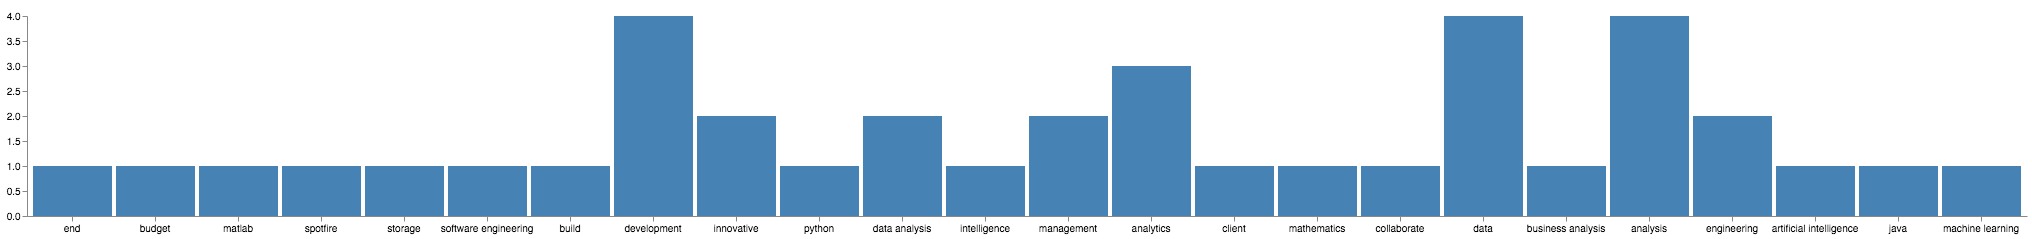

In [45]:
Vega({
  "$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "width": 2000,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": first_job_matches
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "skill"},
      "range": "width",
      "padding": 0.05,
      "round": True
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "count"},
      "nice": True,
      "range": "height"
    }
  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "skill"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "count"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.skil", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.count", "offset": -2},
          "text": {"signal": "tooltip.count"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
})



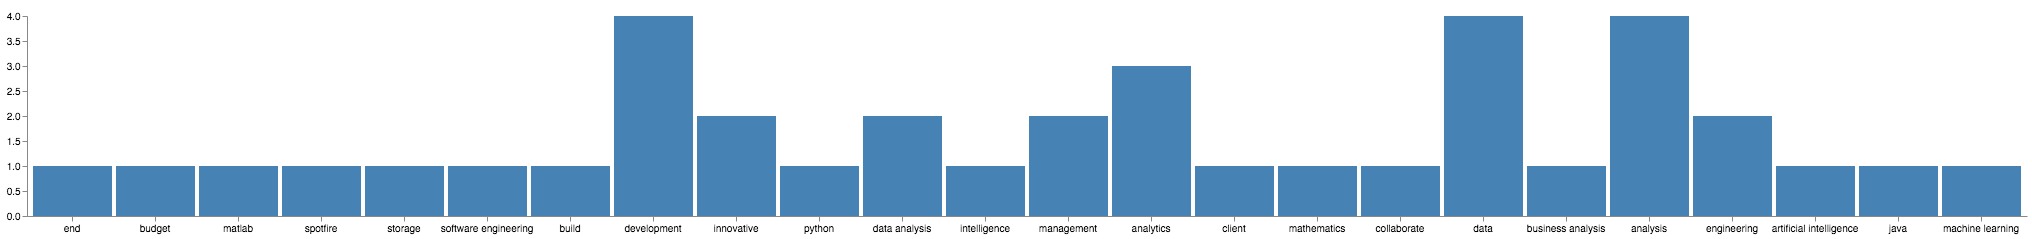

In [46]:
fifth_job_matches = new_array_of_jobs[5]['word_counts']
fifth_job_matches_copy =  fifth_job_matches.copy()
fifth_job_matches_copy.sort(key=extract_time, reverse=True)
fifth_job_matches_copy = showOnlyData(fifth_job_matches_copy)
Vega({
  "$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "width": 2000,
  "height": 200,
  "padding": 5,

  "data": [
    {
      "name": "table",
      "values": first_job_matches
    }
  ],

  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],

  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "skill"},
      "range": "width",
      "padding": 0.05,
      "round": True
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "count"},
      "nice": True,
      "range": "height"
    }
  ],

  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "skill"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "count"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.skil", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.count", "offset": -2},
          "text": {"signal": "tooltip.count"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
})

In [47]:
thirteen_job_matches = new_array_of_jobs[13]['word_counts']
thirteen_job_matches_copy = thirteen_job_matches.copy()
thirteen_job_matches_copy.sort(key=extract_time, reverse=True)
thirteen_job_matches_copy = showOnlyData(thirteen_job_matches_copy)

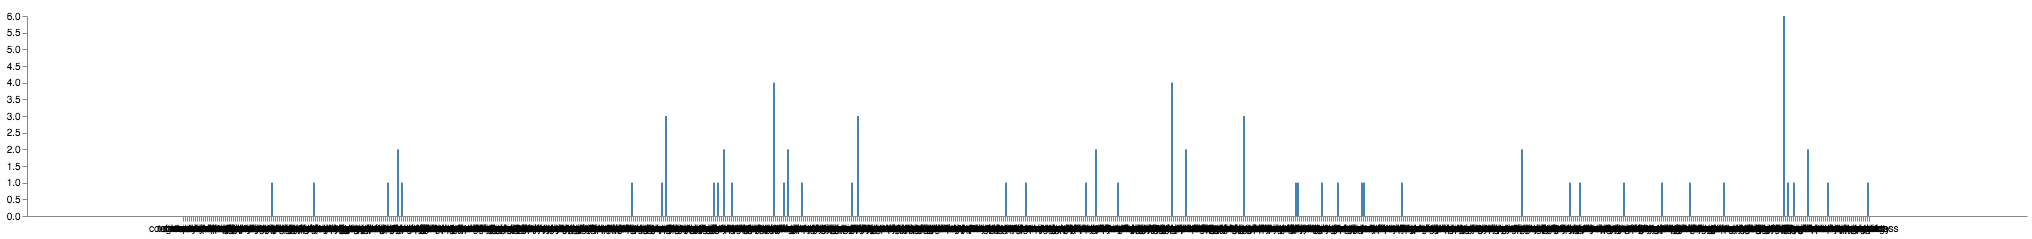

In [48]:
Vega({
  "$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "width": 2000,
  "height": 200,
  "padding": 5,
  "data": [
    {
      "name": "table",
      "values": thirteen_job_matches
    }
  ],
  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "skill"},
      "range": "width",
      "padding": 0.05,
      "round": True
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "count"},
      "nice": True,
      "range": "height"
    }
  ],
  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "skill"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "count"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.skil", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.count", "offset": -2},
          "text": {"signal": "tooltip.count"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
})


In [49]:
fifthteen_job_matches = new_array_of_jobs[15]['word_counts']
fifthteen_job_matches_copy = fifthteen_job_matches.copy()
fifthteen_job_matches_copy.sort(key=extract_time, reverse=True)
fifthteen_job_matches_copy = showOnlyData(fifthteen_job_matches_copy)

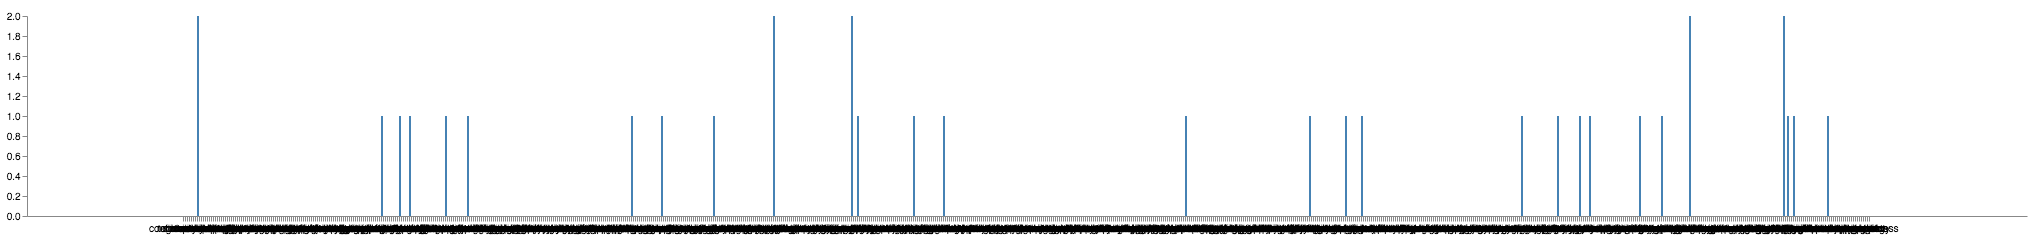

In [50]:
Vega({
  "$schema": "https://vega.github.io/schema/vega/v3.0.json",
  "width": 2000,
  "height": 200,
  "padding": 5,
  "data": [
    {
      "name": "table",
      "values": fifthteen_job_matches
    }
  ],
  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "skill"},
      "range": "width",
      "padding": 0.05,
      "round": True
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "count"},
      "nice": True,
      "range": "height"
    }
  ],
  "axes": [
    { "orient": "bottom", "scale": "xscale" },
    { "orient": "left", "scale": "yscale" }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data":"table"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "skill"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "count"},
          "y2": {"scale": "yscale", "value": 0}
        },
        "update": {
          "fill": {"value": "steelblue"}
        },
        "hover": {
          "fill": {"value": "red"}
        }
      }
    },
    {
      "type": "text",
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {"scale": "xscale", "signal": "tooltip.skil", "band": 0.5},
          "y": {"scale": "yscale", "signal": "tooltip.count", "offset": -2},
          "text": {"signal": "tooltip.count"},
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    }
  ]
})


In [51]:
def convertJSONtoDataArray(jsonData):
    holder_of_features = []
    holder_of_labels = []
    for job in jsonData:
        skill_holder = []
        for count in job["word_counts"]:
            skill_holder.append(int(count["count"]))
        
        holder_of_features.append(skill_holder)
        if job["job"] == "Software Engineer":
            holder_of_labels.append(0)
        elif job["job"] == "Data Scientist":
            holder_of_labels.append(1)
        else:
            print("THERE IS A PROBLEM YOU HAVE A WEIRD JOB TITLE")
    return holder_of_features,holder_of_labels
            
            

In [52]:
holder_of_features,holder_of_labels = convertJSONtoDataArray(new_array_of_jobs)

In [53]:
holder_of_features

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [54]:
holder_of_labels

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [55]:
import json
with open('holder_of_features.json', 'w') as outfile:
    json.dump(holder_of_features, outfile)

In [56]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [58]:


X = holder_of_features[4:15]
y = holder_of_labels[4:15]
# clf = svm.SVC()
# clf = svm.NuSVC()
# clf.fit(X, y)  

ValueError: X.shape[1] = 2 should be equal to 844, the number of features at training time

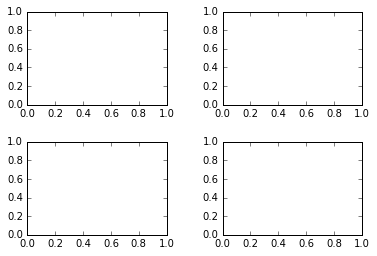

In [89]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:,0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

In [72]:
clf.predict([holder_of_features[1]])

array([1])

In [73]:
clf.predict([holder_of_features[2]])

array([0])

In [74]:
clf.predict([holder_of_features[3]])

array([1])

In [75]:
clf.predict([holder_of_features[4]])

array([1])

In [76]:
clf.predict([holder_of_features[5]])

array([1])

In [77]:
clf.predict([holder_of_features[6]])

array([1])

In [78]:
clf.predict([holder_of_features[7]])

array([1])

In [79]:
clf.predict([holder_of_features[8]])

array([1])

In [80]:
clf.predict([holder_of_features[9]])

array([1])

In [81]:
clf.predict([holder_of_features[10]])

array([0])

In [82]:
clf.predict([holder_of_features[11]])

array([0])

In [83]:
clf.predict([holder_of_features[12]])

array([0])

In [84]:
clf.predict([holder_of_features[13]])

array([0])

In [85]:
clf.predict([holder_of_features[14]])

array([0])

In [86]:
clf.predict([holder_of_features[15]])

array([0])

In [87]:
clf.predict([holder_of_features[16]])

array([0])

In [88]:
clf.predict([holder_of_features[17]])

array([0])

X [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.

TypeError: list indices must be integers or slices, not tuple

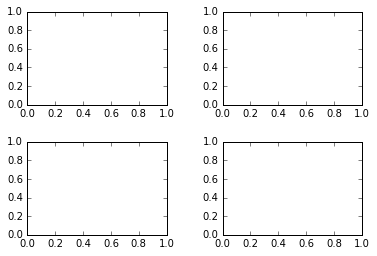

In [441]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
print("X",X)
print("y",y)

X = holder_of_features[4:15]
y = holder_of_labels[4:15]
print("X",X)
print("y",y)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, -1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


/Users/justingosses/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/justingosses/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


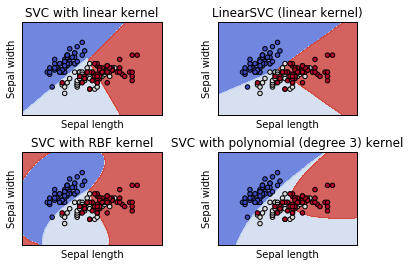

In [432]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


Points on flag:
color
green    10291
red       4709
dtype: int64


AttributeError: 'dict' object has no attribute 'iteritems'

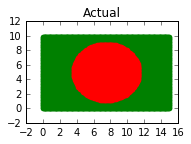

In [446]:
import numpy as np
import pylab as pl
import pandas as pd

from sklearn import svm
from sklearn import linear_model
from sklearn import tree

from sklearn.metrics import confusion_matrix

x_min, x_max = 0, 15
y_min, y_max = 0, 10
step = .1
# to plot the boundary, we're going to create a matrix of every possible point
# then label each point as a wolf or cow using our classifier
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

df = pd.DataFrame(data={'x': xx.ravel(), 'y': yy.ravel()})

df['color_gauge'] = (df.x-7.5)**2 + (df.y-5)**2
df['color'] = df.color_gauge.apply(lambda x: "red" if x <= 15 else "green")
df['color_as_int'] = df.color.apply(lambda x: 0 if x=="red" else 1)

print("Points on flag:")
print(df.groupby('color').size())

figure = 1

# plot a figure for the entire dataset
for color in df.color.unique():
    idx = df.color==color
    pl.subplot(2, 2, figure)
    pl.scatter(df[idx].x, df[idx].y, color=color)
    pl.title('Actual')


train_idx = df.x < 10

train = df[train_idx]
test = df[-train_idx]


# print "Training Set Size: %d" % len(train)
# print "Test Set Size: %d" % len(test)

# train using the x and y position coordiantes
cols = ["x", "y"]

clfs = {
    "SVM": svm.SVC(degree=0.5),
    "Logistic" : linear_model.LogisticRegression(),
    "Decision Tree": tree.DecisionTreeClassifier()
}


# racehorse different classifiers and plot the results
for clf_name, clf in clfs.iteritems():
    figure += 1

    # train the classifier
    clf.fit(train[cols], train.color_as_int)

    # get the predicted values from the test set
    test['predicted_color_as_int'] = clf.predict(test[cols])
    test['pred_color'] = test.predicted_color_as_int.apply(lambda x: "red" if x==0 else "green")
    
    # create a new subplot on the plot
    pl.subplot(2, 2, figure)
    # plot each predicted color
    for color in test.pred_color.unique():
        # plot only rows where pred_color is equal to color
        idx = test.pred_color==color
        pl.scatter(test[idx].x, test[idx].y, color=color)

    # plot the training set as well
    for color in train.color.unique():
        idx = train.color==color
        pl.scatter(train[idx].x, train[idx].y, color=color)

    # add a dotted line to show the boundary between the training and test set
    # (everything to the right of the line is in the test set)
    #this plots a vertical line
    train_line_y = np.linspace(y_min, y_max) #evenly spaced array from 0 to 10
    train_line_x = np.repeat(10, len(train_line_y)) #repeat 10 (threshold for traininset) n times
    # add a black, dotted line to the subplot
    pl.plot(train_line_x, train_line_y, 'k--', color="black")
    
    pl.title(clf_name)

    print("Confusion Matrix for %s:" % clf_name)
    print(confusion_matrix(test.color, test.pred_color))
pl.show()


[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.1 1.5]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 [6.5 2.8 4.6]
 [5.7 2.8 4.5]
 [6.3 3.3 4.7]
 [4.9 2.4 3.3]
 [6.6 2.9 4.6]
 [5.2 2.7 3.9]
 [5.  2.  3.5]
 [5.9 3.  4.2]
 [6.  2.2 4. ]
 [6.1 2.9 4.7]
 [5.6 2.9 3.6]
 [6.7 3.1 4.4]
 [5.6 3.  

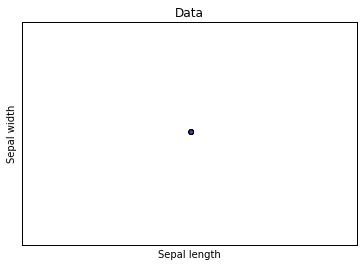

In [462]:
# import matplotlib
# matplotlib.use('GTKAgg')
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
 
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
y = iris.target
print(X,type(X))
print(y)

X = np.array(holder_of_features[4:15])
y = np.array(holder_of_labels[4:15])
print("X",X)
print("y",y)


print(X,type(X))
print(y)

h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Data')
plt.show()

In [61]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=clf, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)

ImportError: No module named 'mlxtend.plotting'

X [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
y [1 1 1 1 1 1 0 0 0 0 0]


ValueError: Filler values must be provided when X has more than 2 training features.

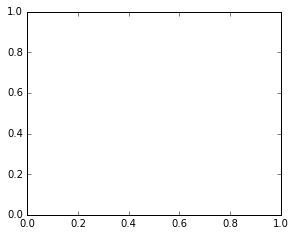

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
import mlxtend
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

# Loading some example data
# X, y = iris_data()
# X = X[:,[0, 2]]

X = np.array(holder_of_features[4:15])
y = np.array(holder_of_labels[4:15])
print("X",X)
print("y",y)

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# # Build a classification task using 3 informative features
# X, y = make_classification(n_samples=1000,
#                            n_features=10,
#                            n_informative=3,
#                            n_redundant=0,
#                            n_repeated=0,
#                            n_classes=2,
#                            random_state=0,
#                            shuffle=False)

X = np.array(holder_of_features[4:15])
y = np.array(holder_of_labels[4:15])
print("X",X)
print("y",y)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
# print("X",X)
X = X[0:10]
    
# Plot the feature importances of the forest
plt.figure(figsize=(2000, 100))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

NameError: name 'holder_of_features' is not defined

In [71]:
clf.predict([holder_of_features[1]])

array([1])

In [70]:
http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#training-a-classifier

SyntaxError: invalid syntax (<ipython-input-70-b996c1bee229>, line 1)